Fraud doesn’t just cost money—it costs trust. As a key member of a financial compliance team, your mission is to uncover suspicious transactions that might otherwise slip through the cracks. With the stakes this high, your insights could be the difference between stopping fraud in its tracks or letting it go unnoticed.

In this project, you'll harness the power of IForest from pyod.models to detect anomalies in banking data. Your challenge: flag unusual transactions, summarize your findings, and deliver actionable insights that ensure trust, security, and efficiency in financial operations.

In [131]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Data Import

In [132]:
df = pd.read_csv('transactions.csv')

In [133]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [134]:
df.shape

(2512, 16)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# Selecting features

In [136]:
X = df[['TransactionAmount', 'TransactionDuration', 'AccountBalance']]

In [137]:
X

,TransactionAmount,TransactionDuration,AccountBalance
0,14.09,81,5112.21
1,376.24,141,13758.91
2,126.29,56,1122.35
3,184.50,25,8569.06
4,13.45,198,7429.40
...,...,...,...
2507,856.21,109,12690.79
2508,251.54,177,254.75
2509,28.63,146,3382.91
2510,185.97,19,1776.91


# Model Building

In [138]:
#Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [139]:
#Créer et entraîner le modèle
model = IsolationForest(contamination=0.04, random_state=42) 
model.fit(X_scaled)

IsolationForest(contamination=0.04, random_state=42)

In [140]:
# Calculer les scores d’anomalie
df["anomaly_score"] = model.decision_function(X_scaled)
df["anomaly"] = model.predict(X_scaled)

# Interpret the results

In [141]:
# Le modèle retourne -1 pour anomalie, 1 pour normal
anomalies = df[df["anomaly"] == -1]

In [142]:
# Afficher les anomalies détectées
print("Nombre d'anomalies détectées :", len(anomalies))

Nombre d'anomalies détectées : 101


In [143]:
anomalies

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,anomaly_score,anomaly
41,TX000042,AC00480,34.02,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,38,Doctor,19,1,14214.48,2024-11-04 08:11:45,-0.009405,-1
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51,-0.043801,-1
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53,-0.051352,-1
141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,ATM,80,Retired,21,1,2037.85,2024-11-04 08:10:34,-0.003660,-1
146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,77,Retired,296,1,2042.22,2024-11-04 08:11:44,-0.045630,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,TX002335,AC00016,1105.88,2023-03-06 17:37:32,Debit,Omaha,D000159,41.82.55.163,M047,ATM,34,Engineer,36,1,2636.32,2024-11-04 08:11:22,-0.003177,-1
2380,TX002381,AC00098,1173.74,2023-09-25 16:44:52,Credit,Virginia Beach,D000639,193.190.29.63,M086,Online,61,Doctor,61,1,10456.24,2024-11-04 08:07:31,-0.013611,-1
2403,TX002404,AC00111,1493.00,2023-06-07 17:05:41,Debit,Colorado Springs,D000344,136.162.111.135,M096,ATM,69,Retired,151,1,1619.16,2024-11-04 08:07:07,-0.057112,-1
2414,TX002415,AC00028,1664.33,2023-09-25 17:11:19,Debit,San Antonio,D000072,116.106.207.139,M064,Branch,18,Student,65,1,1588.31,2024-11-04 08:07:07,-0.066222,-1


In [144]:
print(anomalies["anomaly_score"].max())  # Devrait être ≥ 0.01

-0.0002791080973021387


In [145]:
anomalies = anomalies[anomalies["anomaly_score"] <= 0.01]

In [146]:
print(anomalies["anomaly_score"].min())  # Devrait être ≥ 0.01

-0.1297409376774119


<Axes: >

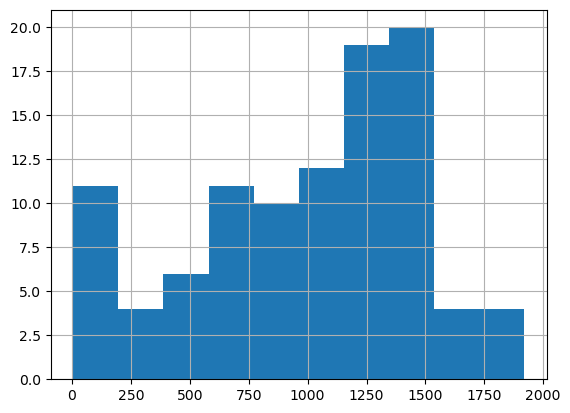

In [108]:
anomalies['TransactionAmount'].hist()

<Axes: >

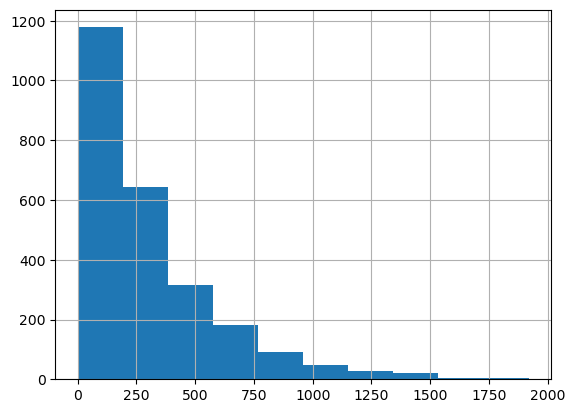

In [109]:
df['TransactionAmount'].hist()